VITADEVI RAHMAWATI

DS-04130

Pada kasus kali ini, akan dicoba dilakukan pembentukan model klasifikasi untuk menentukan apakah suatu perusahaan dapat dikatakan mengalami kebangkrutan atau tidak berdasarkan beberapa feature yang telah disediakan.

#Libraries

In [ ]:
# General Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px
!pip install joypy
import joypy
import os
import glob

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

# Machine Learning Libraries
import sklearn
from scipy import stats
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample #for Bootstrap sampling
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold, cross_validate, learning_curve
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
!pip install optuna
import optuna

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.1 MB/s eta 0:00:00


#Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import io
bankruptcy = pd.read_csv(io.BytesIO(uploaded['data.csv']))

#Statistics Descriptive

Pada bagian ini akan diberikan gambaran umum mengenai dataset sebelum dilakukan analisis

In [ ]:
bankruptcy.head() #menampilkan data beberapa baris awal

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [ ]:
bankruptcy.info() #menampilkan informasi dari data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

Output di atas menampilkan mengenai jumlah dan tipe data dari setiap feature. Selain itu, bisa dilihat juga bahwa tidak ada missing value pada data.

In [ ]:
bankruptcy.describe() #menampilkan statistik deskriptif data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

Berdasarkan tabel di atas, ditampilkan beberapa output untuk statistik deskriptif tiap varibel numerik, yaitu total data, nilai rata - rata, nilai standar deviasi, nilai minimal, quartil bawah, nilai median, kuartil atas, dan nilai maksimal. Statistik deskrtiptif ini bermanfaat untuk melihat keseluruhan dataset secara umum sebelum dilakukan analisis

Pada dataset tersebut terdapat beberapa variabel kategori, yaitu 'Bankrupt?', 'Liability-Assets Flag', dan 'Net Income Flag'. Oleh karena itu, dikarenakan variabel kategori adalah variabel kualitatif dan tidak dapat direpresentasikan dengan angka, maka untuk variabel ketiga variabel tersebut, analisis yang dapat dilakukan adalah menghitung frekuensi tiap kategori.

In [ ]:
#cumulative and relative frequencies
Bankrupt = bankruptcy['Bankrupt?']
#group by Bankrupt?
Bankrupt = pd.DataFrame(Bankrupt.value_counts(sort=True))
#create new column with cumulative sum
Bankrupt['cum_sum'] = Bankrupt['Bankrupt?'].cumsum()
#create new column with relative frequency
Bankrupt['cum_perc'] = 100*Bankrupt['cum_sum']/Bankrupt['Bankrupt?'].sum()
Bankrupt

,Bankrupt?,cum_sum,cum_perc
0,6599,6599,96.77372
1,220,6819,100.00000


In [ ]:
#cumulative and relative frequencies
LiabilityA = bankruptcy[' Liability-Assets Flag']
#group by Liability-Assets Flag
LiabilityA = pd.DataFrame(LiabilityA.value_counts(sort=True))
#create new column with cumulative sum
LiabilityA['cum_sum'] = LiabilityA[' Liability-Assets Flag'].cumsum()
#create new column with relative frequency
LiabilityA['cum_perc'] = 100*LiabilityA['cum_sum']/LiabilityA[' Liability-Assets Flag'].sum()
LiabilityA

,Liability-Assets Flag,cum_sum,cum_perc
0,6811,6811,99.882681
1,8,6819,100.000000


In [ ]:
#cumulative and relative frequencies
NetIF = bankruptcy[' Net Income Flag']
#group by Net Income Flag
NetIF = pd.DataFrame(NetIF.value_counts(sort=True))
#create new column with cumulative sum
NetIF['cum_sum'] = NetIF[' Net Income Flag'].cumsum()
#create new column with relative frequency
NetIF['cum_perc'] = 100*NetIF['cum_sum']/NetIF[' Net Income Flag'].sum()
NetIF

,Net Income Flag,cum_sum,cum_perc
1,6819,6819,100.0


Berikut akan ditampilkan box plot untuk visualisasi nilai minimum, maksimum, median, dll.

In [ ]:
# Overview of summary (0 V.S. 1)
bankrupt_Summary = bankruptcy.groupby('Bankrupt?')
bankrupt_Summary.mean()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.508069,0.562015,0.556659,0.608257,0.608237,0.998756,0.79721,0.809106,0.303657,0.781401,1.998943e+09,1.961923e+09,0.467656,1.690392e+07,0.117778,0.191669,0.191644,0.191680,0.230146,0.323731,1.372935e+06,0.109815,0.185581,0.022409,0.848010,0.689242,0.689244,0.217656,5.531603e+09,2.045765e+05,0.264277,0.379871,416729.822913,7.257160e+06,0.630997,4.037733e+06,0.110714,0.889286,0.008696,0.374129,0.005811,0.109692,0.183883,0.402276,0.142860,1.303122e+07,1.013305e+07,2.149922e+09,9.756574e+08,0.038454,1.335051e+06,0.401226,1.110368e+07,0.816207,0.403318,0.524058,0.126640,3.712684e+06,2.989953e+07,0.088887,0.354323,0.277399,5.571944e+07,0.762384,0.736130,0.331031,5.407900e+07,0.935749,0.002565,0.028495,1.189712e+09,2.147829e+09,0.594011,2.481653e+09,0.671530,2.468865e-01,0.762384,0.331031,0.115149,0.650340,0.462085,0.594649,0.315721,0.030542,0.000303,0.810083,1.621670e+07,0.623927,0.608256,0.840882,0.279925,0.027511,0.565371,1.0,0.048337
1,0.418503,0.456947,0.461483,0.598670,0.598717,0.998739,0.79659,0.808424,0.302609,0.780799,1.887486e+09,1.605623e+09,0.460681,2.772727e+06,0.031690,0.160416,0.160301,0.160459,0.188818,0.316006,2.732298e-02,0.087354,0.147765,0.022378,0.847087,0.686280,0.686345,0.217121,4.803017e+09,4.240909

#Data Pre-processing

Sebelum melakukan pemrosesan, data mentah akan diolah terlebih dahulu. Pre-processing dilakukan dalam beberapa langkah, yaitu data cleaning, data integration, transformasi data, dan mengeliminasi data. Tujuan dari pre-processing ini adalah untuk mendapatkan data yang lebih efisien sehingga performa model yang dihasilkan juga lebih baik.

##Missing Value

Dilakukan pengecekan apakah terdapat data yang hilang pada tiap feature

In [ ]:
bankruptcy.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [ ]:
[print(col) for col in bankruptcy if bankruptcy[col].isna().sum() > 0]

[]

Dapat disimpulkan bahwa tidak terdapat missing value pada setiap feature

##Duplicates

Dilakukan pengecekan apakah terdapat data yang merupakan duplikasi

In [ ]:
bankruptcy.duplicated().sum()

0

In [ ]:
bankruptcy2 = bankruptcy.copy() #membuat copy-an dari data asli agar jika terjadi kesalahan tidak perlu mengulang dari awal

Dapat disimpulkan bahwa tidak terdapat data yang merupakan duplikasi

##Visualisasi data

Dilakukan pengecekan apakah terdapat outlier pada setiap feature

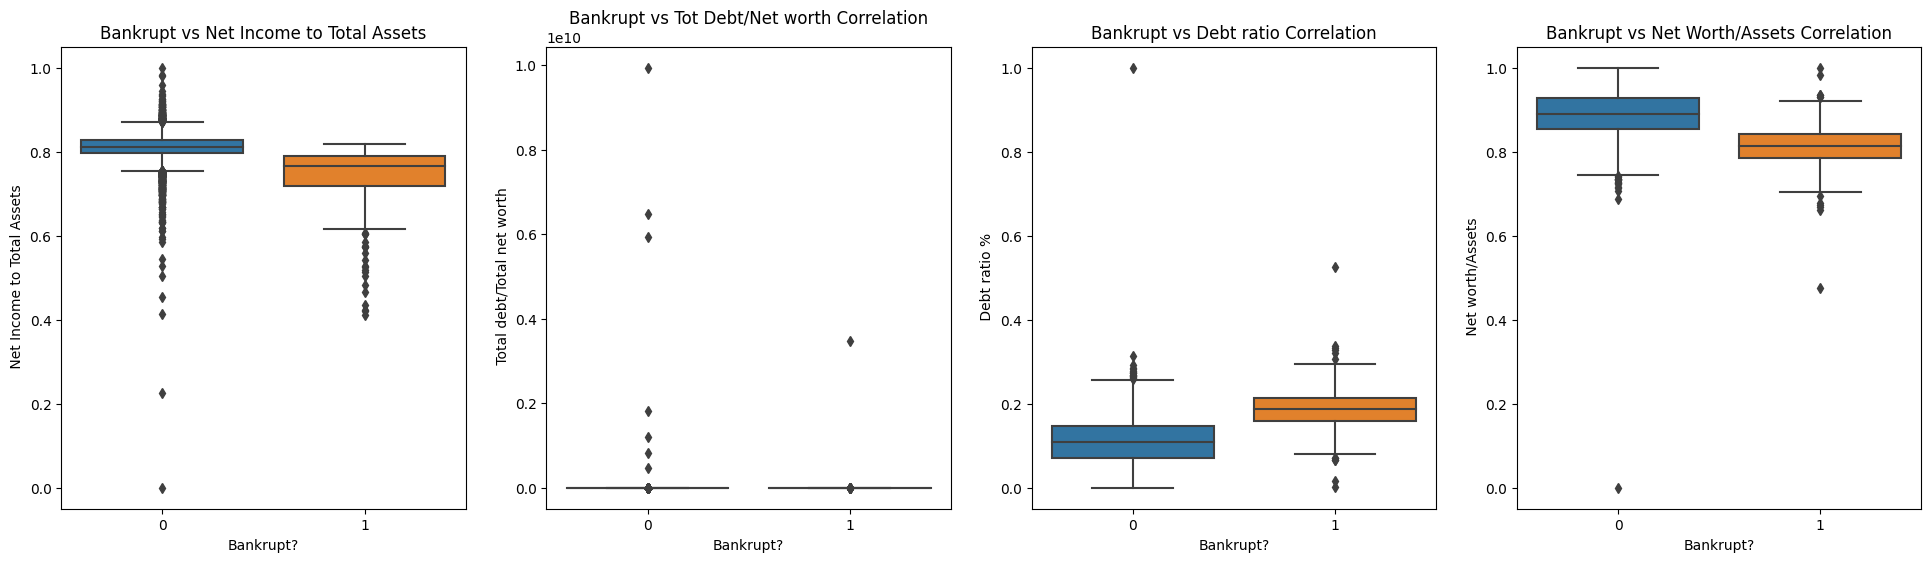

In [ ]:
#Dikarenakan terdapat 95 variabel independen, maka pembentukan barplot hanya dilakukan pada
#variabel - variabel tertentu saja agar tidak memakan terlalu banyak waktu
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='Bankrupt?', y=" Net Income to Total Assets", data=bankruptcy, ax=axes[0])
axes[0].set_title('Bankrupt vs Net Income to Total Assets')

sns.boxplot(x='Bankrupt?', y=" Total debt/Total net worth", data=bankruptcy, ax=axes[1])
axes[1].set_title('Bankrupt vs Tot Debt/Net worth Correlation')


sns.boxplot(x='Bankrupt?', y=" Debt ratio %", data=bankruptcy, ax=axes[2])
axes[2].set_title('Bankrupt vs Debt ratio Correlation')


sns.boxplot(x='Bankrupt?', y=" Net worth/Assets", data=bankruptcy, ax=axes[3])
axes[3].set_title('Bankrupt vs Net Worth/Assets Correlation')

plt.show()

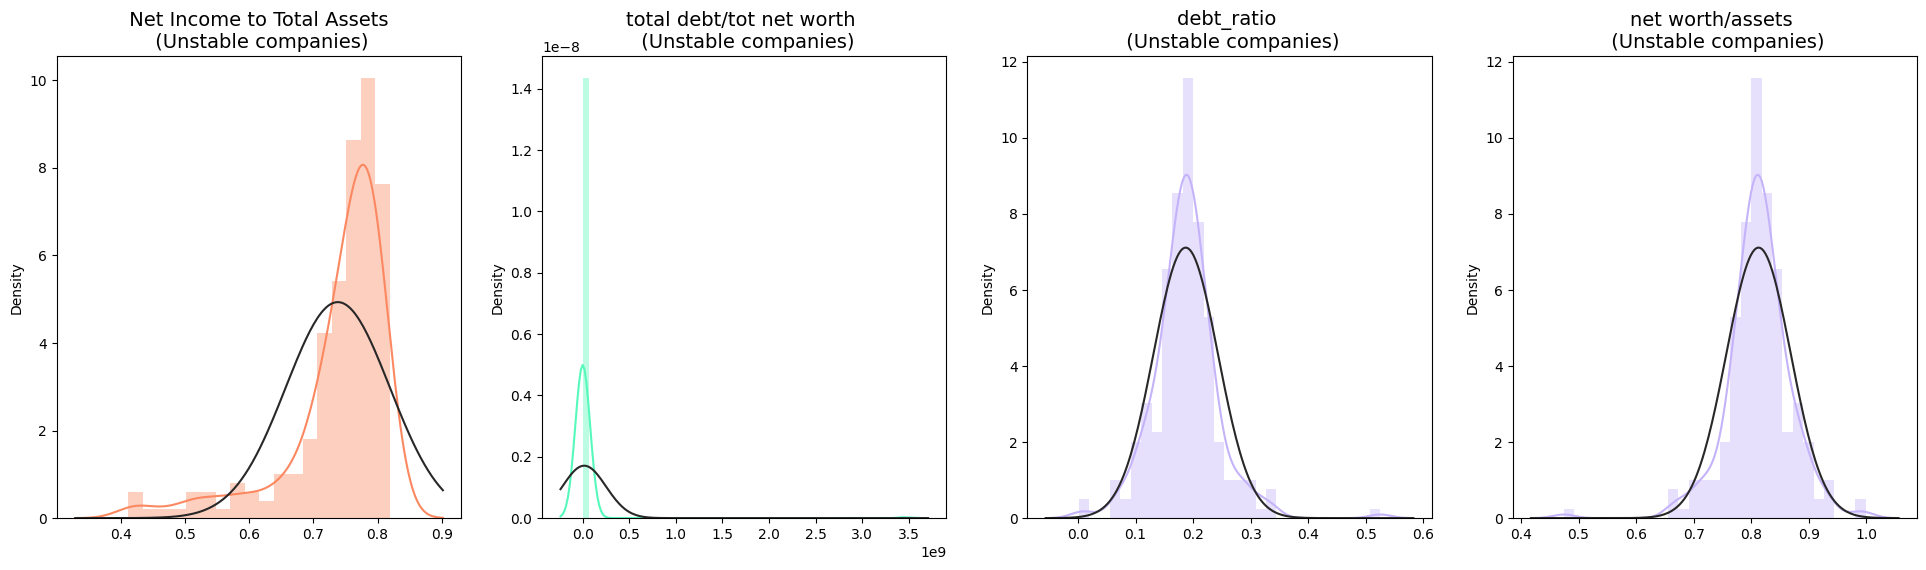

In [ ]:
#Dikarenakan terdapat 95 variabel independen, maka pembentukan distribusi juga hanya dilakukan pada
#variabel - variabel tertentu saja agar tidak memakan terlalu banyak waktu
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = bankruptcy[' Net Income to Total Assets'].loc[bankruptcy['Bankrupt?'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = bankruptcy[' Total debt/Total net worth'].loc[bankruptcy['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = bankruptcy[' Debt ratio %'].loc[bankruptcy['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = bankruptcy[' Net worth/Assets'].loc[bankruptcy['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net worth/assets \n (Unstable companies)', fontsize=14)

plt.show()

##Correlation

Melihat korelasi dari setiap variabel

In [ ]:
corr = bankruptcy2.corr()
corr.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,-0.023063,-0.109706,-0.165399,-0.165465,-0.164784,-0.219560,-0.077516,-0.004692,-0.142051,-0.201395,-0.000458,-0.015168,-0.037783,-0.036820,-0.009401,-0.044431,0.065329,-0.016858,-0.051345,-0.002211,0.025058,-0.002681,0.012314,0.250161,-0.250161,0.016920,0.176543,0.070455,-0.141111,-0.207857,0.075278,-0.067915,-0.004754,-0.006556,-0.001376,0.072818,0.021089,0.039718,-0.092842,0.002829,-0.193083,-0.086382,-0.044823,-0.100130,-0.003823,0.077921,0.194494,-0.077082,-0.001906,0.000822,-0.020809,-0.147221,0.153828,0.000778,-0.217779,-0.007137,0.139049,0.011929,0.025814,-0.002894,-0.018035,0.000479,0.066328,-0.020809,0.153828,0.139014,-0.070456,-0.043125,-0.115383,-0.058563,0.171306,0.139212,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,0.066869,0.106461,0.323482,0.048882,0.250761,0.505580,0.505407,0.505281,0.775006,0.379839,-0.015932,0.687201,0.750564,0.000591,0.036511,0.115083,0.115040,0.025234,0.019635,-0.021930,0.079906,0.296158,0.013196,-0.026336,0.003988,-0.022208,-0.26

Dikarenakan terdapat 95 feature maka akan ditampilkan heat map dari beberapa feature saja.

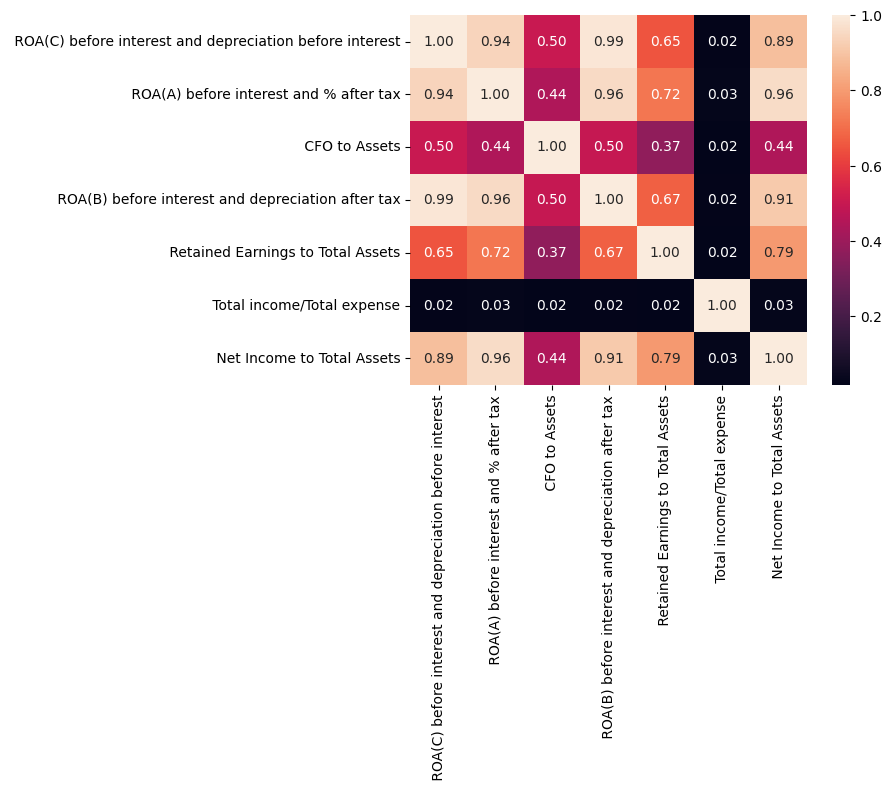

In [ ]:
corr_feature = bankruptcy2[[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax',' CFO to Assets',
                ' ROA(B) before interest and depreciation after tax', ' Retained Earnings to Total Assets',' Total income/Total expense',' Net Income to Total Assets']].corr()
sns.heatmap(corr_feature,annot=True,fmt=".2f")
plt.show()

##Penghapusan outliers

Berdasarkan boxplot yang telah dibuat sebelumnya dapat dilihat bahwa terdapa outliers pada beberapa feature. Berikutnya, akan dibentuk fungsi untuk menghapus nilai outliers yang ada.

In [ ]:
def outliers_removal(feature,feature_name,dataset): #dibentuk fungsi untuk menghapus nilai outlier dari data
  q1 = feature.quantile(0.25) #nilai kuartil bawah
  q3 = feature.quantile(0.75) #nilai kuartil atas
  iqr = q3-q1 #nilai inter quartil range
  cut_off = 1.5*iqr #nilai cut off
  lower_bound = q1 - cut_off #nilai batas bawah
  upper_bound = q3 + cut_off #nilai batas atas
  print("Untuk feature", feature_name)
  print('IQR:', iqr)
  print('Cut Off:', cut_off)
  print('Kuartil bawah:', q1)
  print('Kuartil atas:', q3)
  outliers = [x for x in feature if x < lower_bound or x > upper_bound] #terdapat dua kondisi suatu nilai dikatakan outlier, yaitu jika < batas bawah atau > batas atas
  print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))

  dataset = dataset.drop(dataset[(dataset[feature_name] > upper_bound) | (dataset[feature_name] < lower_bound)].index) #penghapusan nilai yang merupakan outlier
  print('-' * 100)

  return dataset

for col in bankruptcy2:
  new_bankruptcy = outliers_removal(bankruptcy2[col],str(col),bankruptcy2) #pengaplikasian fungsi outliers_removal

Untuk feature Bankrupt?
IQR: 0.0
Cut Off: 0.0
Kuartil bawah: 0.0
Kuartil atas: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
----------------------------------------------------------------------------------------------------
Untuk feature  ROA(C) before interest and depreciation before interest
IQR: 0.05903573343733198
Cut Off: 0.08855360015599797
Kuartil bawah: 0.476527080388047
Kuartil atas: 0.535562813825379
 ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
----------------------------------------------------------------------------------------------------
Untuk feature  ROA(A) before interest and % after tax
IQR: 0.05361426079372
Cut Off: 0.08042139119058
Kuartil bawah: 0.53554295682512
Kuartil atas: 0.58915721761884
 ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
----------------------------------------------------------------------------------------------------
Untuk feature  ROA(B

#Feature Selection

Dikarenakan terdapat 94 variabel independen yang dimungkinkan tidak semua memiliki peran penting dalam pembentukan model maka akan dilakukan feature selection sehingga hanya variabel independen yang sekiranya berpengaruh pada model yang akan diambil.

In [ ]:
train = new_bankruptcy.drop(['Bankrupt?'], axis=1)
target = new_bankruptcy['Bankrupt?']
train.head(2)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.40575,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.51673,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794


In [ ]:
num_features_opt = 40   # banyaknya feature yang akan dipilih pada akhir
num_features_max = 55   # banyaknya feature yang dipilih pada tiap bagian
features_best = []

###FS with the Pearson correlation

Pada bagian ini akan dilakukan feature selection menggunakan korelasi pearson. Nilai yang dihasilkan pada Pearson’s terletak pada [-1;1], untuk nilai -1 yang berarti korelasi negatif sempurna, +1 berarti korelasi positif sempurna, dan 0 yang berarti tidak ada korelasi linier antara kedua variabel tersebut.

Akan ditentukan ambang batas nilai korelasi sebesar 0.9 yang akan digunakan untuk melakukan feature selection.

In [ ]:
# Threshold adalah ambang batas nilai korelasi
threshold = 0.9

def highlight(value):
    if value > threshold:
        style = 'background-color: black'
    else:
        style = 'background-color: blue'
    return style

# Absolute value correlation matrix
corr_matrix = new_bankruptcy.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.style.format("{:.2f}").applymap(highlight)

In [ ]:
#menyeleksi kolom yang memiliki nilai korelasi di atas nilai ambang batas
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
features_filtered = bankruptcy2.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  76


###FS by the SelectFromModel with LinearSVC

SelectFromModel adalah meta-transformator yang dapat digunakan bersama estimator apa pun yang menetapkan kepentingan untuk setiap fitur melalui atribut tertentu (seperti coef_, feature_importances_) atau melalui importance_getter. Fitur dianggap tidak penting dan dihapus jika nilai fitur berada di bawah parameter ambang batas yang disediakan. Selain menentukan ambang batas secara numerik, ada heuristik bawaan untuk menemukan ambang batas menggunakan argumen string.

SelectFromModel menggunakan Linear Support Vector Classification.

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

###FS by the SelectFromModel with Lasso

SelectFromModel adalah meta-transformator yang dapat digunakan bersama estimator apa pun yang menetapkan kepentingan untuk setiap fitur melalui atribut tertentu (seperti coef_, feature_importances_) atau melalui importance_getter. Fitur dianggap tidak penting dan dihapus jika nilai fitur berada di bawah parameter ambang batas yang disediakan. Selain menentukan ambang batas secara numerik, ada heuristik bawaan untuk menemukan ambang batas menggunakan argumen string.

SelectFromModel menggunakan Lasso Regression.

Lasso adalah singkatan dari Least Absolute Shrinkage and Selection Operator. Merupakan jenis regresi linier yang menggunakan penyusutan (shrinkage). Penyusutan adalah tempat nilai data menyusut menuju titik pusat, seperti rata-rata. Lasso adalah regularization constraint yang diperkenalkan pada fungsi objektif model linier untuk mencegah overfitting model prediktif ke data.

Lasso regularization memiliki kemampuan untuk mengatur beberapa koefisien menjadi nol. Hal ini berarti bahwa Lasso dapat digunakan untuk feature selection. Jika koefisien yang mengalikan beberapa fitur adalah 0, kita dapat dengan aman menghapus fitur tersebut dari data. Sisanya adalah fitur penting dalam data.

In [ ]:
lasso = LassoCV(cv=3).fit(train, target)
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(train)
X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
features_best.append(X_selected_df.columns.tolist())

###FS by the SelectKBest with Chi-2

SelectKBest merupakan salah satu feature selection univariat yang bekerja dengan memilih fitur terbaik berdasarkan uji statistik univariat. SelectKBest dapat dilihat sebagai langkah prapemrosesan ke estimator. SelectKBest bekerja dengan menghapus semua kecuali k fitur dengan skor tertinggi.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(train, target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(train.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
features_best.append(featureScores.nlargest(num_features_max,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score'))

                                     Feature         Score
58                    Cash/Current Liability  2.628329e+11
75                    Fixed Assets to Assets  2.309754e+11
48           Fixed Assets Turnover Frequency  2.292166e+11
29                     Net Value Growth Rate  2.239213e+11
86                 Total assets to GNP price  8.157841e+10
..                                       ...           ...
23   Realized Sales Gross Profit Growth Rate  5.723874e-06
72            Working capitcal Turnover Rate  3.528137e-06
74                        Cash Flow to Sales  4.620340e-07
5                      Operating Profit Rate  2.514528e-08
93                           Net Income Flag  0.000000e+00

[95 rows x 2 columns]


###FS by the Recursive Feature Elimination (RFE) with Logistic Regression

Feature selection menggunakan RFE bertujuan untuk memilih fitur dengan mempertimbangkan secara rekursif set fitur yang lebih kecil dan lebih kecil.

Pertama, estimator dilatih pada set fitur awal dan setiap fitur yang penting diperoleh baik melalui atribut tertentu (seperti coef_, feature_importances_) atau dipanggil secara tersendiri. Kemudian, fitur yang paling tidak penting dipangkas dari serangkaian fitur saat ini. Prosedur itu diulangi secara rekursif pada set yang dipangkas sampai jumlah fitur yang diinginkan untuk dipilih akhirnya tercapai.

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
rfe_selector.fit(train, target)
rfe_support = rfe_selector.get_support()
rfe_feature = train.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 95 features.
Fitting estimator with 85 features.
Fitting estimator with 75 features.
Fitting estimator with 65 features.
55 selected features


In [ ]:
features_best.append(rfe_feature)

###FS by the Recursive Feature Elimination (RFE) with Random Forest

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
embeded_rf_selector.fit(train, target)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=200),
                threshold='1.25*median')

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

31 selected features


In [ ]:
features_best.append(embeded_rf_feature)

###FS by the VarianceThreshold

VarianceThreshold adalah pendekatan dasar sederhana untuk feature selection. VarianceThreshold menghapus semua fitur yang variansnya tidak memenuhi ambang batas. Secara default, VarianceThreshold menghapus semua fitur varians nol, yaitu fitur yang memiliki nilai yang sama di semua sampel.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Check whether all features have a sufficiently different meaning
selector = VarianceThreshold(threshold=10)
np.shape(selector.fit_transform(new_bankruptcy))
features_best.append(list(np.array(new_bankruptcy.columns)[selector.get_support(indices=False)]))

###Selection the best features

In [ ]:
features_best

[['Bankrupt?',
  ' ROA(C) before interest and depreciation before interest',
  ' Operating Gross Margin',
  ' Operating Profit Rate',
  ' Non-industry income and expenditure/revenue',
  ' Operating Expense Rate',
  ' Research and development expense rate',
  ' Cash flow rate',
  ' Interest-bearing debt interest rate',
  ' Tax rate (A)',
  ' Net Value Per Share (B)',
  ' Persistent EPS in the Last Four Seasons',
  ' Cash Flow Per Share',
  ' Revenue Per Share (Yuan ¥)',
  ' Operating Profit Per Share (Yuan ¥)',
  ' Realized Sales Gross Profit Growth Rate',
  ' Operating Profit Growth Rate',
  ' After-tax Net Profit Growth Rate',
  ' Continuous Net Profit Growth Rate',
  ' Total Asset Growth Rate',
  ' Net Value Growth Rate',
  ' Total Asset Return Growth Rate Ratio',
  ' Cash Reinvestment %',
  ' Current Ratio',
  ' Quick Ratio',
  ' Interest Expense Ratio',
  ' Total debt/Total net worth',
  ' Debt ratio %',
  ' Long-term fund suitability ratio (A)',
  ' Borrowing dependency',
  ' Cont

In [ ]:
# Most common items in all lists of optimal features
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in new_bankruptcy.columns.tolist()}
for i in range(len(features_best)):
    for feature_name in features_best[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(num_features_opt)

,Num
Net Value Growth Rate,5
Cash/Current Liability,5
Fixed Assets Turnover Frequency,5
Quick Ratio,5
Interest-bearing debt interest rate,5
Fixed Assets to Assets,5
Inventory Turnover Rate (times),4
Quick Assets/Current Liability,4
Cash/Total Assets,4
Quick Assets/Total Assets,4


In [ ]:
main_cols = df_main_cols_opt.nlargest(num_features_opt, 'Num').index.tolist()
if not 'Bankrupt?' in main_cols:
    main_cols.append('Bankrupt?')
main_cols

[' Interest-bearing debt interest rate',
 ' Net Value Growth Rate',
 ' Quick Ratio',
 ' Fixed Assets Turnover Frequency',
 ' Cash/Current Liability',
 ' Fixed Assets to Assets',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Total Asset Growth Rate',
 ' Current Ratio',
 ' Debt ratio %',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Cash/Total Assets',
 ' Quick Assets/Current Liability',
 ' Inventory/Current Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Quick Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' Total assets to GNP price',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Pe

In [ ]:
pd.set_option("display.max_columns", 100)
len(main_cols)

41

###Fixed data with feature selection

In [ ]:
bankruptcy3 = new_bankruptcy[main_cols]

#Standardisasi

Standardisasi adalah metode preprocessing yang digunakan untuk mengubah data kontinu agar terlihat terdistribusi normal. Standardisasi dapat mencegah dari timbulnya bias pada model.

Dapat dilihat bahwa pada barplot dan distribusi dari beberapa feature yang sudah ditampilkan sebelumnya terdapat data yang merupakan outlier dan beberapa feature tidak berdistribusi normal. Oleh karena itu, dilakukan prose sstandardisasi untuk mendapatkan data yang lebih baik dari data sebelumnya.

Akan dilakukan scaling pada feature yang ada dikarenakan pada histogram yang telah ditampilkan sebelumnya terlihat bahwa data tidak berdistribusi normal

In [ ]:
bankruptcy3 = bankruptcy3.reindex(bankruptcy3.columns[bankruptcy3.columns != 'Bankrupt?'].union(['Bankrupt?']), axis=1)

In [ ]:
feature_bankruptcy3 = bankruptcy3.drop(['Bankrupt?'], axis = 1)

In [ ]:
def log_trans(feature_bankruptcy3):

    for col in feature_bankruptcy3:
        skew = feature_bankruptcy3[col].skew()
        if skew > 0.5 or skew < -0.5:
            feature_bankruptcy3[col] = np.log1p(feature_bankruptcy3[col])
        else:
            continue

    return feature_bankruptcy3

data_norm = log_trans(feature_bankruptcy3)

#Splitting Dataset

Data dibagi ke dalam data train dan data test dengan pembagian 80:20

In [ ]:
y = bankruptcy3['Bankrupt?']
X = data_norm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [ ]:
print('Shape of X: {}'.format(X_train.shape))
print('Shape of y: {}'.format(X_test.shape))
print('Shape of y: {}'.format(y_test.shape))
print('Shape of y: {}'.format(y_train.shape))

Shape of X: (5016, 40)
Shape of y: (1254, 40)
Shape of y: (1254,)
Shape of y: (5016,)


#SMOTE

Dapat dilihat pada histogram di bawah bahwa terdapat perbedaan kelas yang signifikan antara kelas 0 dan 1 atau bisa dikatakan terdapat imbalanced data. Oleh karena itu, untuk meningkatkan akurasi dari model yang akan dibentuk lebih baik bahwa tiap kelas memiliki jumlah data yang sama. SMOTE adalah salah satu teknik untuk mengatasi imbalanced data.

In [ ]:
fig = px.histogram(y_train)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train=: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 4843 

After OverSampling, the shape of X_train=: (9686, 40)
After OverSampling, the shape of y_train: (9686,) 

After OverSampling, counts of label '1': 4843
After OverSampling, counts of label '0': 4843


Diperoleh data train akhir setelah dilakukan SMOTE, yaitu total kelas 0 sebanyak 4843 dan total kelas 1 sebanyak 4843



---


#MODUL 4


---



#Pembentukan Model

Akan digunakan tiga model pada kasus kali ini, yaitu random forest, Extreme Gradient Boosting, dan Naive Bayes. Sebelumnya telah dilakukan analisis trial and error dan didapatkan beberapa model yang dapat digunakan. Random Forest dan XGBoost memiliki akurasi yang cukup tinggi, sedangkan Naive Bayes memiliki akurasi yang cukup rendah. Oleh karena itu, dipilih ketiga model tersebut untuk dapat membandingkan apakah antara dua model yang memiliki akurasi tinggi memberikan hasil yang sama pada prediksi maupun hasil feature importance nanti dan apa yang terjadi pada prediksi maupun hasil feature importance ketika akurasi yang ada sangatlah rendah.

Alasan lain pemilihan random forest adalah algoritma tersebut merupakan penggabungan dari beberapa decision tree yang mana setiap tree pada Random Forest akan mengeluarkan prediksi kelas. Prediksi kelas dengan vote terbanyak menjadi kandidat prediksi pada model. Semakin banyak jumlah tree maka akan menghasilkan akurasi yang lebih tinggi dan mencegah masalah overfitting.

Alasan lain pemilihan XGBoost adalah algoritma ini menggabungkan prediksi beberapa model lemah untuk menghasilkan prediksi yang lebih kuat. Salah satu kelebihan XGBoost adalah dapat menangani missing value secara efisien. Selain itu, XGBoost memungkinkan untuk melakukan training model pada kumpulan data besar dalam jumlah waktu yang wajar.

Alasan lain pemilihan Naive Bayes adalah ingin melihat apakah algoritma naive bayes memang tidak terlalu cocok digunakan karena algoritma itu sendiri memerlukan beberapa asumsi yang perlu dipenuhi.

##Random Forest

Base Model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)
pred_rfc = rfc.predict_proba(X_test)
y_predproba_rfc = (pred_rfc[:, 1] > 0.5).astype('float')

In [ ]:
y_test

4336    0
3271    0
3640    0
1397    0
4060    0
       ..
6236    0
1341    0
5400    0
2408    0
1057    0
Name: Bankrupt?, Length: 1254, dtype: int64

In [ ]:
pred_rfc[:, 1]

array([0.  , 0.  , 0.06, ..., 0.  , 0.65, 0.  ])

In [ ]:
print(classification_report(y_test, y_predproba_rfc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1209
           1       0.40      0.58      0.47        45

    accuracy                           0.95      1254
   macro avg       0.69      0.77      0.72      1254
weighted avg       0.96      0.95      0.96      1254



In [ ]:
rfc_accuracy = accuracy_score(y_test, y_predproba_rfc)
rfc_precision = precision_score(y_test, y_predproba_rfc, average='micro')
rfc_recall = recall_score(y_test, y_predproba_rfc, average='micro')
rfc_f1 = f1_score(y_test, y_predproba_rfc, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(rfc_accuracy))
print("Precision: {:.4f}".format(rfc_precision))
print("Recall: {:.4f}".format(rfc_recall))
print("F1-Score: {:.4f}".format(rfc_f1))

Micro-average quality numbers
Accuracy: 0.9537
Precision: 0.9537
Recall: 0.9537
F1-Score: 0.9537


Hyperparameter Tuning

In [ ]:
def objective(trial):
    # Define the hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

    # Create a random forest classifier
    rfco = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # Train the classifier and calculate the accuracy on the validation set
    rfco.fit(X_train_res, y_train_res)
    score = rfco.score(X_test, y_test)

    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
rfco = RandomForestClassifier(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"],
    min_samples_leaf=best_params["min_samples_leaf"]
)
rfco.fit(X_train_res, y_train_res)

# Evaluate the tuned classifier on the test set
score = rfco.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2023-04-25 00:43:01,405] A new study created in memory with name: no-name-f81efa99-4447-4f3d-88b1-e53be659712a
[I 2023-04-25 00:43:07,175] Trial 0 finished with value: 0.08851674641148322 and parameters: {'n_estimators': 138, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.08851674641148322.
[I 2023-04-25 00:43:11,878] Trial 1 finished with value: 0.10127591706539074 and parameters: {'n_estimators': 150, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.08851674641148322.
[I 2023-04-25 00:43:31,334] Trial 2 finished with value: 0.11164274322169054 and parameters: {'n_estimators': 664, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.08851674641148322.
[I 2023-04-25 00:44:19,838] Trial 3 finished with value: 0.06618819776714513 and parameters: {'n_estimators': 986, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 3 with v

Best hyperparameters:  {'n_estimators': 991, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best score:  0.9513556618819776
Test set accuracy:  0.9505582137161085


In [ ]:
rfch2 = RandomForestClassifier(n_estimators= 765, max_depth= 15, min_samples_split= 3, min_samples_leaf= 3)
rfch2.fit(X_train_res, y_train_res)
pred_rfch2 = rfch2.predict_proba(X_test)
y_predproba_rfch2 = (pred_rfch2[:, 1] > 0.5).astype('float')

In [ ]:
print(classification_report(y_test, y_predproba_rfch2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1209
           1       0.39      0.71      0.50        45

    accuracy                           0.95      1254
   macro avg       0.69      0.83      0.74      1254
weighted avg       0.97      0.95      0.96      1254



In [ ]:
rfch2_accuracy = accuracy_score(y_test, y_predproba_rfch2)
rfch2_precision = precision_score(y_test, y_predproba_rfch2, average='micro')
rfch2_recall = recall_score(y_test, y_predproba_rfch2, average='micro')
rfch2_f1 = f1_score(y_test, y_predproba_rfch2, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(rfch2_accuracy))
print("Precision: {:.4f}".format(rfch2_precision))
print("Recall: {:.4f}".format(rfch2_recall))
print("F1-Score: {:.4f}".format(rfch2_f1))

Micro-average quality numbers
Accuracy: 0.9490
Precision: 0.9490
Recall: 0.9490
F1-Score: 0.9490


CrossValidation

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
precision = make_scorer(precision_score, average='micro')
recall = make_scorer(recall_score, average='micro')
f1 = make_scorer(f1_score, average='micro')

In [ ]:
rfc_cv = cross_val_score(rfch2, X, y, cv=5)
rfc_cv_p = cross_val_score(rfch2, X, y, scoring=precision, cv=5)
rfc_cv_r = cross_val_score(rfch2, X, y, scoring=recall, cv=5)
rfc_cv_f1 = cross_val_score(rfch2, X, y, scoring=f1,cv=5)
print("Accuracy with cross-validation: %.4f with standard deviation %.2f" % (rfc_cv.mean(), rfc_cv.std()))
print("Precision with cross-validation: %.4f with standard deviation %.2f" % (rfc_cv_p.mean(), rfc_cv_p.std()))
print("Recall with cross-validation: %.4f with standard deviation %.2f" % (rfc_cv_r.mean(), rfc_cv_r.std()))
print("F1-Score with cross-validation: %.4f with standard deviation %.2f" % (rfc_cv_f1.mean(), rfc_cv_f1.std()))

Accuracy with cross-validation: 0.9640 with standard deviation 0.01
Precision with cross-validation: 0.9638 with standard deviation 0.01
Recall with cross-validation: 0.9640 with standard deviation 0.01
F1-Score with cross-validation: 0.9643 with standard deviation 0.01


Bootstraping

In [ ]:
# Use bootstrapping to estimate the accuracy of the model
n_bootstraps = 100
accuracies = []
for i in range(n_bootstraps):
    # Sample the data with replacement
    indices = np.random.choice(range(len(bankruptcy3)), size=len(bankruptcy3), replace=True)
    X_boot = X.iloc[indices]
    y_boot = y.iloc[indices]
    # Train the model on the bootstrap sample
    rfch2.fit(X_boot, y_boot)
    # Evaluate the model on the entire dataset
    accuracy = rfch2.score(X, y)
    accuracies.append(accuracy)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
lower_ci = mean_accuracy - 1.96 * std_accuracy
upper_ci = mean_accuracy + 1.96 * std_accuracy

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci, upper_ci))

Mean accuracy: 0.98
95% confidence interval: [0.98, 0.99]


In [ ]:
param = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_ht = RandomizedSearchCV(estimator = modelxgb, param_distributions = param,
                            n_iter = 50, scoring = 'neg_root_mean_squared_error',
                            cv = 5, verbose=3)

xgb_search = xgb_ht.fit(X2_train_res, y2_train_res)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBClassifier(**best_param)

##Extreme Gradient Boosting

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train_res, y_train_res)
xgb_pred = xgb.predict_proba(X_test)
y_predproba_xgb = (xgb_pred[:, 1] > 0.5).astype('float')

In [ ]:
print(classification_report(y_test, y_predproba_xgb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1209
           1       0.44      0.62      0.52        45

    accuracy                           0.96      1254
   macro avg       0.72      0.80      0.75      1254
weighted avg       0.97      0.96      0.96      1254



In [ ]:
xgb_accuracy = accuracy_score(y_test, y_predproba_xgb)
xgb_precision = precision_score(y_test, y_predproba_xgb, average='micro')
xgb_recall = recall_score(y_test, y_predproba_xgb, average='micro')
xgb_f1 = f1_score(y_test, y_predproba_xgb, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(xgb_accuracy))
print("Precision: {:.4f}".format(xgb_precision))
print("Recall: {:.4f}".format(xgb_recall))
print("F1-Score: {:.4f}".format(xgb_f1))

Micro-average quality numbers
Accuracy: 0.9585
Precision: 0.9585
Recall: 0.9585
F1-Score: 0.9585


Hyperparameter Tuning

In [ ]:
def objective(trial):
    # Define the hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1)
    max_depth = trial.suggest_int("max_depth", 3, 7)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 5)

    # Create an XGBoost classifier
    xgbo = XGBClassifier(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_child_weight=min_child_weight
    )

    # Train the classifier and calculate the accuracy on the validation set
    xgbo.fit(X_train_res, y_train_res)
    score = xgbo.score(X_test, y_test)

    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
xgbo = XGBClassifier(
    learning_rate=best_params["learning_rate"],
    max_depth=best_params["max_depth"],
    n_estimators=best_params["n_estimators"],
    min_child_weight=best_params["min_child_weight"]
)
xgbo.fit(X_train_res, y_train_res)

# Evaluate the tuned classifier on the test set
score = xgbo.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2023-04-30 01:42:12,891] A new study created in memory with name: no-name-5a22a88f-95f7-4ac7-882e-55944fa83304
[I 2023-04-30 01:43:10,325] Trial 0 finished with value: 0.08532695374800636 and parameters: {'learning_rate': 0.002458915386844333, 'max_depth': 5, 'n_estimators': 785, 'min_child_weight': 3}. Best is trial 0 with value: 0.08532695374800636.
[I 2023-04-30 01:43:53,553] Trial 1 finished with value: 0.03907496012759171 and parameters: {'learning_rate': 0.060216935664136675, 'max_depth': 5, 'n_estimators': 733, 'min_child_weight': 1}. Best is trial 1 with value: 0.03907496012759171.
[I 2023-04-30 01:44:38,887] Trial 2 finished with value: 0.04226475279106856 and parameters: {'learning_rate': 0.04221970967417533, 'max_depth': 7, 'n_estimators': 624, 'min_child_weight': 4}. Best is trial 1 with value: 0.03907496012759171.
[I 2023-04-30 01:44:46,754] Trial 3 finished with value: 0.06539074960127589 and parameters: {'learning_rate': 0.07757476354020378, 'max_depth': 3, 'n_estimat

Best hyperparameters:  {'learning_rate': 0.06523057487481058, 'max_depth': 6, 'n_estimators': 843, 'min_child_weight': 1}
Best score:  0.9649122807017544
Test set accuracy:  0.9649122807017544


In [ ]:
xgbh2 = XGBClassifier(learning_rate= 0.08035195776102771, max_depth= 6, n_estimators= 799, min_child_weight= 1)
xgbh2.fit(X_train_res, y_train_res)
xgbh2_pred = xgbh2.predict_proba(X_test)
y_predproba_xgbh2 = (xgbh2_pred[:, 1] > 0.5).astype('float')

In [ ]:
print(classification_report(y_test, y_predproba_xgbh2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1209
           1       0.48      0.62      0.54        45

    accuracy                           0.96      1254
   macro avg       0.73      0.80      0.76      1254
weighted avg       0.97      0.96      0.96      1254



In [ ]:
xgbh2_accuracy = accuracy_score(y_test, y_predproba_xgbh2)
xgbh2_precision = precision_score(y_test, y_predproba_xgbh2, average='micro')
xgbh2_recall = recall_score(y_test, y_predproba_xgbh2, average='micro')
xgbh2_f1 = f1_score(y_test, y_predproba_xgbh2, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(xgbh2_accuracy))
print("Precision: {:.4f}".format(xgbh2_precision))
print("Recall: {:.4f}".format(xgbh2_recall))
print("F1-Score: {:.4f}".format(xgbh2_f1))

Micro-average quality numbers
Accuracy: 0.9625
Precision: 0.9625
Recall: 0.9625
F1-Score: 0.9625


CrossValidation

In [ ]:
precision = make_scorer(precision_score, average='micro')
recall = make_scorer(recall_score, average='micro')
f1 = make_scorer(f1_score, average='micro')

In [ ]:
xgb_cv = cross_val_score(xgbh2, X, y, cv=5)
xgb_cv_p = cross_val_score(xgbh2, X, y, scoring=precision, cv=5)
xgb_cv_r = cross_val_score(xgbh2, X, y, scoring=recall, cv=5)
xgb_cv_f1 = cross_val_score(xgbh2, X, y, scoring=f1,cv=5)
print("Accuracy with cross-validation: %.4f with standard deviation %.4f" % (xgb_cv.mean(), xgb_cv.std()))
print("Precision with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_p.mean(), xgb_cv_p.std()))
print("Recall with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_r.mean(), xgb_cv_r.std()))
print("F1-Score with cross-validation: %.4f with standard deviation %.2f" % (xgb_cv_f1.mean(), xgb_cv_f1.std()))

Bootstraping

In [ ]:
# Use bootstrapping to estimate the accuracy of the model
n_bootstraps2 = 100
accuracies2 = []
for i in range(n_bootstraps2):
    # Sample the data with replacement
    indices2 = np.random.choice(range(len(bankruptcy3)), size=len(bankruptcy3), replace=True)
    X_boot2 = X.iloc[indices2]
    y_boot2 = y.iloc[indices2]
    # Train the model on the bootstrap sample
    xgbh2.fit(X_boot2, y_boot2)
    # Evaluate the model on the entire dataset
    accuracy2 = xgbh2.score(X, y)
    accuracies2.append(accuracy2)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy2 = np.mean(accuracies2)
std_accuracy2 = np.std(accuracies2)
lower_ci2 = mean_accuracy2 - 1.96 * std_accuracy2
upper_ci2 = mean_accuracy2 + 1.96 * std_accuracy2

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy2)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci2, upper_ci2))

##Naive Bayes

In [ ]:
nbc = GaussianNB()
nbc.fit(X_train_res, y_train_res)
nbc_pred = nbc.predict_proba(X_test)
y_predproba_nbc = (nbc_pred[:, 1] > 0.5).astype('float')

In [ ]:
print(classification_report(y_test, y_predproba_nbc))

              precision    recall  f1-score   support

           0       0.99      0.41      0.58      1209
           1       0.05      0.89      0.10        45

    accuracy                           0.43      1254
   macro avg       0.52      0.65      0.34      1254
weighted avg       0.96      0.43      0.56      1254



In [ ]:
nbc_accuracy = accuracy_score(y_test, y_predproba_nbc)
nbc_precision = precision_score(y_test, y_predproba_nbc, average='micro')
nbc_recall = recall_score(y_test, y_predproba_nbc, average='micro')
nbc_f1 = f1_score(y_test, y_predproba_nbc, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(nbc_accuracy))
print("Precision: {:.4f}".format(nbc_precision))
print("Recall: {:.4f}".format(nbc_recall))
print("F1-Score: {:.4f}".format(nbc_f1))

Micro-average quality numbers
Accuracy: 0.4274
Precision: 0.4274
Recall: 0.4274
F1-Score: 0.4274


Hyperparameter Tuning

In [ ]:
def objective(trial):
    # Define the hyperparameters to tune
    var_smoothing = trial.suggest_float("var_smoothing", 1e-11, 1e-10)

    # Create an XGBoost classifier
    nbco = GaussianNB(
        var_smoothing=var_smoothing
    )

    # Train the classifier and calculate the accuracy on the validation set
    nbco.fit(X_train_res, y_train_res)
    score = nbco.score(X_test, y_test)

    return 1.0 - score

# Use Optuna to tune the hyperparameters
study = optuna.create_study()
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters: ", study.best_params)
print("Best score: ", 1.0 - study.best_value)

# Train the classifier with the best hyperparameters on the full training set
best_params = study.best_params
nbco =GaussianNB(
    var_smoothing=best_params["var_smoothing"]
)
nbco.fit(X_train_res, y_train_res)

# Evaluate the tuned classifier on the test set
score = nbco.score(X_test, y_test)
print("Test set accuracy: ", score)

[I 2023-04-25 04:02:55,621] A new study created in memory with name: no-name-0ebf2eae-e8ce-4686-90f4-256d1dd1da84
[I 2023-04-25 04:02:55,641] Trial 0 finished with value: 0.5805422647527911 and parameters: {'var_smoothing': 2.6139286651751038e-11}. Best is trial 0 with value: 0.5805422647527911.
[I 2023-04-25 04:02:55,656] Trial 1 finished with value: 0.5789473684210527 and parameters: {'var_smoothing': 1.599604416973926e-11}. Best is trial 1 with value: 0.5789473684210527.
[I 2023-04-25 04:02:55,672] Trial 2 finished with value: 0.5797448165869219 and parameters: {'var_smoothing': 3.914025387335529e-11}. Best is trial 1 with value: 0.5789473684210527.
[I 2023-04-25 04:02:55,687] Trial 3 finished with value: 0.5797448165869219 and parameters: {'var_smoothing': 5.85318671611372e-11}. Best is trial 1 with value: 0.5789473684210527.
[I 2023-04-25 04:02:55,702] Trial 4 finished with value: 0.5797448165869219 and parameters: {'var_smoothing': 5.748665890408696e-11}. Best is trial 1 with val

Best hyperparameters:  {'var_smoothing': 1.0083750667638805e-11}
Best score:  0.4218500797448166
Test set accuracy:  0.4218500797448166


In [ ]:
nbch2 = GaussianNB(var_smoothing= 8.047714887944345e-11)
nbch2.fit(X_train_res, y_train_res)
nbch2_pred = nbch2.predict_proba(X_test)
y_predproba_nbch2 = (nbch2_pred[:, 1] > 0.5).astype('float')

In [ ]:
print(classification_report(y_test, y_predproba_nbch2))

              precision    recall  f1-score   support

           0       0.99      0.40      0.57      1209
           1       0.05      0.89      0.10        45

    accuracy                           0.42      1254
   macro avg       0.52      0.65      0.34      1254
weighted avg       0.96      0.42      0.56      1254



In [ ]:
nbch2_accuracy = accuracy_score(y_test, y_predproba_nbch2)
nbch2_precision = precision_score(y_test, y_predproba_nbch2, average='micro')
nbch2_recall = recall_score(y_test, y_predproba_nbch2, average='micro')
nbch2_f1 = f1_score(y_test, y_predproba_nbch2, average='micro')

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(nbch2_accuracy))
print("Precision: {:.4f}".format(nbch2_precision))
print("Recall: {:.4f}".format(nbch2_recall))
print("F1-Score: {:.4f}".format(nbch2_f1))

Micro-average quality numbers
Accuracy: 0.4211
Precision: 0.4211
Recall: 0.4211
F1-Score: 0.4211


CrossValidation

In [ ]:
nbc_cv = cross_val_score(nbch2, X, y, cv=5)
nbc_cv_p = cross_val_score(nbch2, X, y, scoring=precision, cv=5)
nbc_cv_r = cross_val_score(nbch2, X, y, scoring=recall, cv=5)
nbc_cv_f1 = cross_val_score(nbch2, X, y, scoring=f1,cv=5)
print("Accuracy with cross-validation: %.4f with standard deviation %.2f" % (nbc_cv.mean(), nbc_cv.std()))
print("Precision with cross-validation: %.4f with standard deviation %.2f" % (nbc_cv_p.mean(), nbc_cv_p.std()))
print("Recall with cross-validation: %.4f with standard deviation %.2f" % (nbc_cv_r.mean(), nbc_cv_r.std()))
print("F1-Score with cross-validation: %.4f with standard deviation %.2f" % (nbc_cv_f1.mean(), nbc_cv_f1.std()))

Accuracy with cross-validation: 0.6976 with standard deviation 0.25
Precision with cross-validation: 0.6976 with standard deviation 0.25
Recall with cross-validation: 0.6976 with standard deviation 0.25
F1-Score with cross-validation: 0.6976 with standard deviation 0.25


Bootstraping

In [ ]:
# Use bootstrapping to estimate the accuracy of the model
n_bootstraps3 = 100
accuracies3 = []
for i in range(n_bootstraps3):
    # Sample the data with replacement
    indices3 = np.random.choice(range(len(bankruptcy3)), size=len(bankruptcy3), replace=True)
    X_boot3 = X.iloc[indices3]
    y_boot3 = y.iloc[indices3]
    # Train the model on the bootstrap sample
    nbch2.fit(X_boot3, y_boot3)
    # Evaluate the model on the entire dataset
    accuracy3 = nbch2.score(X, y)
    accuracies3.append(accuracy3)

# Calculate the mean and confidence interval of the accuracies
mean_accuracy3 = np.mean(accuracies3)
std_accuracy3 = np.std(accuracies3)
lower_ci3 = mean_accuracy3 - 1.96 * std_accuracy3
upper_ci3 = mean_accuracy3 + 1.96 * std_accuracy3

# Print the results
print("Mean accuracy: %.2f" % mean_accuracy3)
print("95%% confidence interval: [%.2f, %.2f]" % (lower_ci3, upper_ci3))

Mean accuracy: 0.66
95% confidence interval: [0.29, 1.02]


#Evaluasi Model

Pemilihan metrics performance menggunakan micro average dikarenakan kelas dari data sudah seimbang dan diinginkan metrics yang mudah dimengerti overall performance-nya terlepas dari kelasnya. Niai dari micro average F1-Score akan sama dengan nilai akurasi yang ada.

##Perbandingan Performansi

Base Model

In [ ]:
models = pd.DataFrame({
    'Model'       : ['Random Forest', 'XGBoost', 'Naive Bayes'],
    'Accuracy'    : [rfc_accuracy, xgb_accuracy, nbc_accuracy],
    'Precision'   : [rfc_precision, xgb_precision, nbc_precision],
    'Recall'      : [rfc_recall, xgb_recall, nbc_recall],
    'F1_score'    : [rfc_f1, xgb_f1, nbc_f1]
    }, columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1_score'])

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score
1,XGBoost,0.956938,0.956938,0.956938,0.956938
0,Random Forest,0.953748,0.953748,0.953748,0.953748
2,Naive Bayes,0.427432,0.427432,0.427432,0.427432


Hyperparameter Tuning

In [ ]:
models = pd.DataFrame({
    'Model (Hyperparameter Tuning)': ['Random Forest', 'XGBoost', 'Naive Bayes'],
    'Accuracy'    : [rfch2_accuracy, xgbh2_accuracy, nbch2_accuracy],
    'Precision'   : [rfch2_precision, xgbh2_precision, nbch2_precision],
    'Recall'      : [rfch2_recall, xgbh2_recall, nbch2_recall],
    'F1_score'    : [rfch2_f1, xgbh2_f1, nbch2_f1]
    }, columns = ['Model (Hyperparameter Tuning)','Accuracy', 'Precision', 'Recall', 'F1_score'])

models.sort_values(by='Accuracy', ascending=False)

,Model (Hyperparameter Tuning),Accuracy,Precision,Recall,F1_score
1,XGBoost,0.958533,0.958533,0.958533,0.958533
0,Random Forest,0.948963,0.948963,0.948963,0.948963
2,Naive Bayes,0.421053,0.421053,0.421053,0.421053


Setelah dilakukan pemilihan parameter terbaik menggunakan hyperparameter tuning didapat nilai f1-score tertinggi diberikan oleh XGBoost sebesar 0.96%, sedangkan untuk Random Forest dan Naive Bayes mengalami penurunan. Penurunan nilai tersebut tersebut bisa terjadi karena kurang luasnya pemilihan rentang parameter yang dipilih sehingga bisa juga parameter terbaik terletak di luar parameter yang telah didefinisikan untuk hyperparameter tuning yang dilakukan atau base model yang dibentuk memang memberikan performansi tinggi, tetapi justru terjadi overfitting di dalamnya.

Cross Validation

In [ ]:
models = pd.DataFrame({
    'Model CV'         : ['Random Forest', 'XGBoost', 'Naive Bayes'],
    'Mean F1_Score'    : [rfc_cv_f1.mean(), xgb_cv_f1.mean(), nbc_cv_f1.mean()]
    }, columns = ['Model CV','Mean F1_Score'])

models.sort_values(by='Mean F1_Score', ascending=False)

,Model CV,Mean F1_Score
0,Random Forest,0.964274
1,XGBoost,0.954705
2,Naive Bayes,0.697608


Cross Validation dilakukan untuk mengevaluasi model dan menghindarkan model dari adanya overfitting dengan membagi data test dan data training secara acak. Nilai Cross Validation dilakukan menggunakan model Random Forest dengan hyperparameter tuning memberikan hasil yang mengalami penurunan dan bisa diindikasikan terdapat overfitting pada model. Di sisi lain, untuk Random Forest dan Naive Bayes mengalami peningkatan yang berarti model prediksi sudah cukup baik.

Bootstraping

In [ ]:
models = pd.DataFrame({
    'Model Bootstrap'  : ['Random Forest', 'XGBoost', 'Naive Bayes'],
    'Mean F1_Score'    : [mean_accuracy, mean_accuracy2, mean_accuracy3]
    }, columns = ['Model Bootstrap','Mean F1_Score'])

models.sort_values(by='Mean F1_Score', ascending=False)

,Model Bootstrap,Mean F1_Score
1,XGBoost,0.988265
0,Random Forest,0.983313
2,Naive Bayes,0.655711


Bootstraping dapat meningkatkan stabilitas dan akurasi dari model juga menghindari terjadinya overfitting dengan melakukan resampling dari data. Nilai dari bootstraping menggunakan model hyperparameter tuning memberikan hasil bahwa nilai dari seluruh model cenderung mengalami peningkatan. Hal tersebut berarti ketiga model akan menghasilkan nilai performansi yang cenderung lebih bagus ketika dilakukan resample data pada model.

##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_predproba_rfc)
cm_xgb = confusion_matrix(y_test, y_predproba_xgb)
cm_nbc = confusion_matrix(y_test, y_predproba_nbc)
cm_rfch = confusion_matrix(y_test, y_predproba_rfch2)
cm_xgbh = confusion_matrix(y_test, y_predproba_xgbh2)
cm_nbch = confusion_matrix(y_test, y_predproba_nbch2)

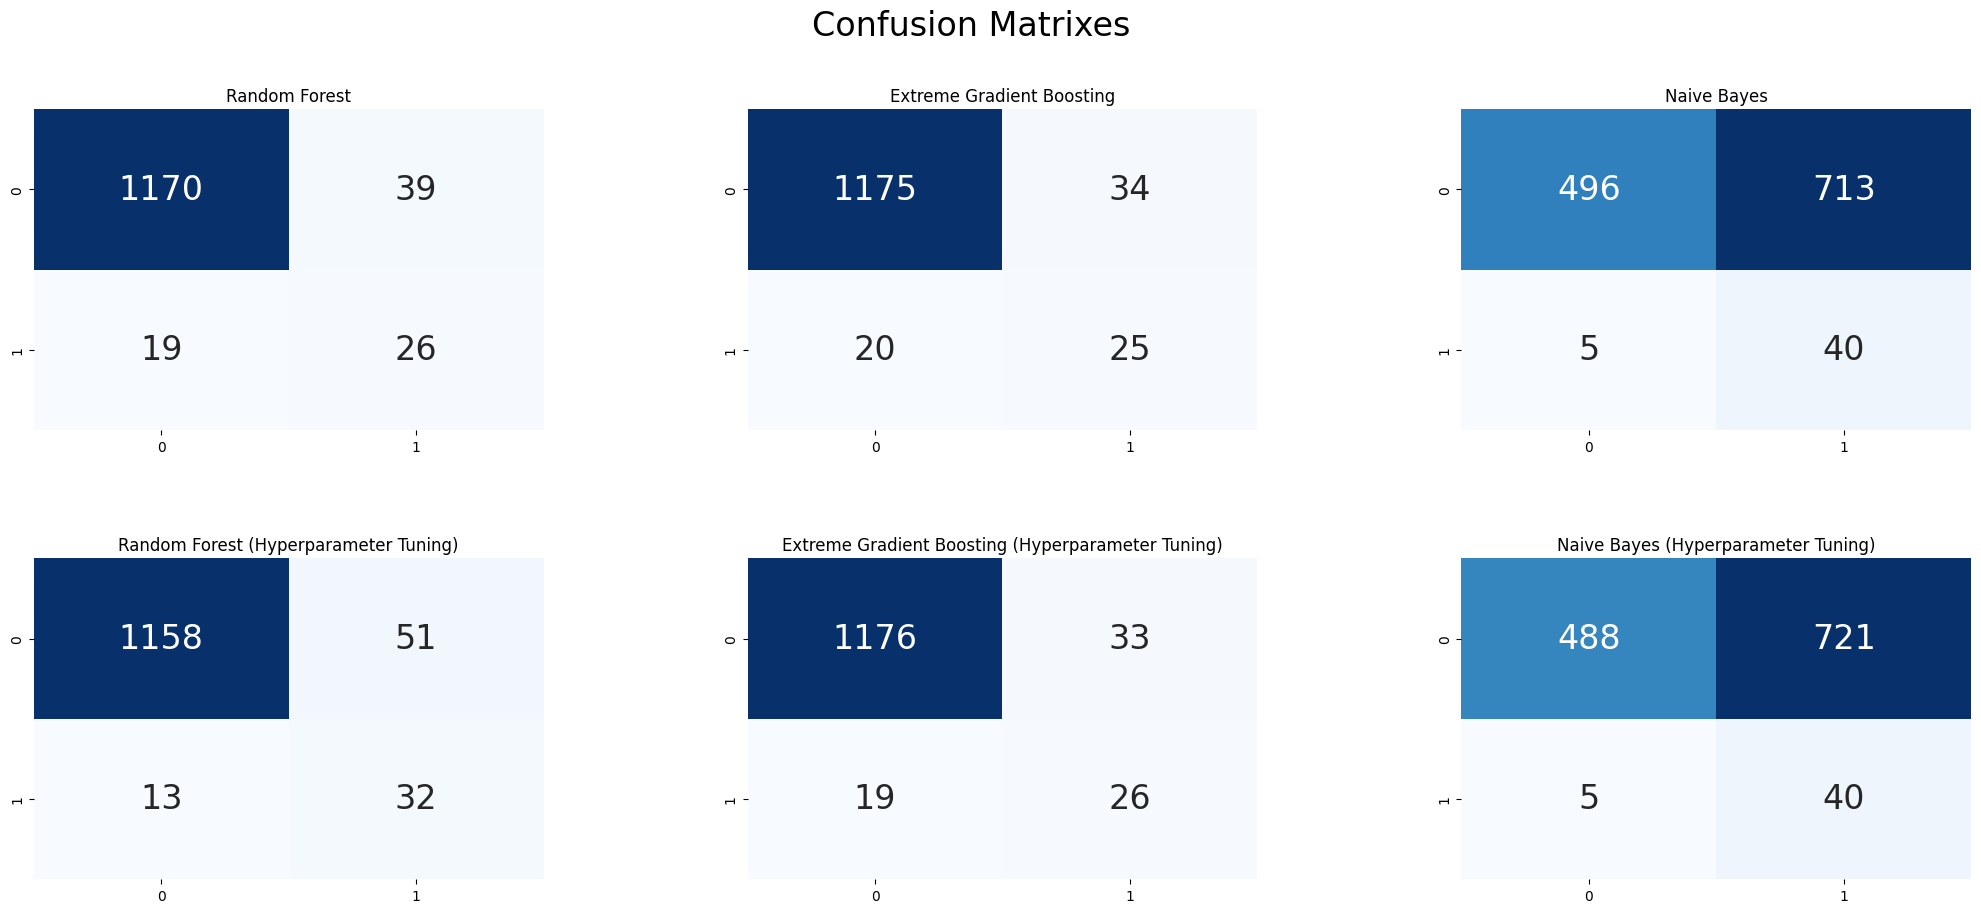

In [ ]:
plt.figure(figsize=(25,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Random Forest")
sns.heatmap(cm_rfc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Extreme Gradient Boosting")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Naive Bayes")
sns.heatmap(cm_nbc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Random Forest (Hyperparameter Tuning)")
sns.heatmap(cm_rfch,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Extreme Gradient Boosting (Hyperparameter Tuning)")
sns.heatmap(cm_xgbh,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Naive Bayes (Hyperparameter Tuning)")
sns.heatmap(cm_nbch,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Bisa dilihat berdasarkan confusion matrix, hyperparameter tuning memberikan hasil True Positive maupu True Negative yang lebih banyak daripada base model.

##AUC-ROC

In [ ]:
# Calculate the AUC-ROC scores (hyperparameter tuning model)
auc_rfc = roc_auc_score(y_test, pred_rfch2[:, 1])
auc_xgb = roc_auc_score(y_test, xgbh2_pred[:, 1])
auc_nbc = roc_auc_score(y_test, nbch2_pred[:, 1])

print(f"AUC-ROC for Random Forest: {auc_rfc}")
print(f"AUC-ROC for Extreme Gradient Boosting: {auc_xgb}")
print(f"AUC-ROC for Naive Bayes: {auc_nbc}")

AUC-ROC for Random Forest: 0.9435713629262017
AUC-ROC for Extreme Gradient Boosting: 0.9312746990166345
AUC-ROC for Naive Bayes: 0.8146769598382503


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

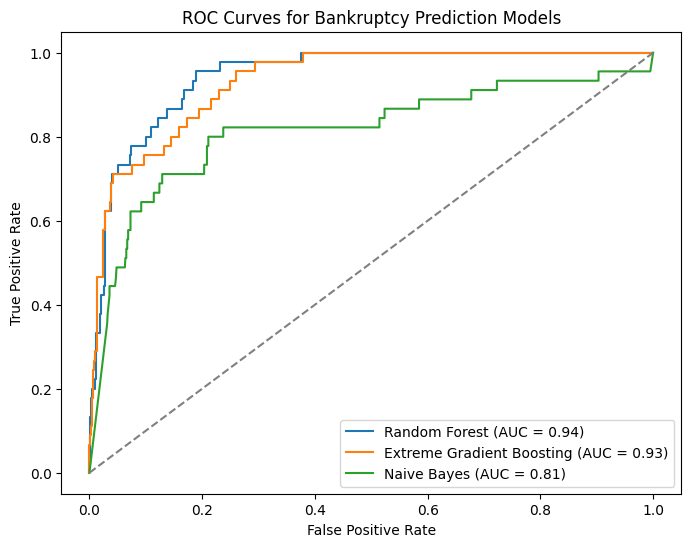

In [ ]:
def plot_roc_curves(y_test, pred_rfch2, xgbh2_pred, nbch2_pred):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_rfc, tpr_rfc, _ = roc_curve(y_test, pred_rfch2[:, 1])
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgbh2_pred[:, 1])
    fpr_nbc, tpr_nbc, _ = roc_curve(y_test, nbch2_pred[:, 1])

    # Plot ROC curves
    plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (AUC = {auc_rfc:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, label=f'Extreme Gradient Boosting (AUC = {auc_xgb:.2f})')
    plt.plot(fpr_nbc, tpr_nbc, label=f'Naive Bayes (AUC = {auc_nbc:.2f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Bankruptcy Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, pred_rfch2, xgbh2_pred, nbch2_pred)

AUC digunakan untuk melihat seberapa baik model dapat memisahkan kelas 0 dan 1 pada data. Semakin mendekati 1, maka model yang dibuat semakin baik dalam memisahkan kelas yang ada. Nilai AUC paling tinggi diberikan oleh model Random Forest dengan menggunakan hyperparameter tuning, diikuti dengan Extreme Gradient Boosting dan Naive Bayes.

Perbedaan model terbaik pada hyperparameter tuning dan AUC-ROC bisa terjadi karena nilai "akurasi, recall, presisi, dan f1-score" model dihitung dengan menentukan threshold tertentu yang mana thereshold tersebut bisa diubah sesuai dengan keinginan peneliti, sedangkan nilai AUC dihitung dengan menambahkan semua nilai "akurasi" pada semua nilai threshold yang mungkin.

Pada kasus kali ini, nilai AUC penting karena pemisahan yang baik antara kelas 0 dan 1 diperlukan dalam membedakan perusahaan mengalami Bankruptcy atau tidak. Nilai AUC pada Random Forest dan XGBoost tidak terlalu berbeda jauh. Oleh karena itu, dikarenakan XGBoost juga merupakan model terbaik pada saat dilakukan pengukuran hyperparameter tuning. Model terbaik pada kasus ini, adalah XGBoost.

##Learning Curve

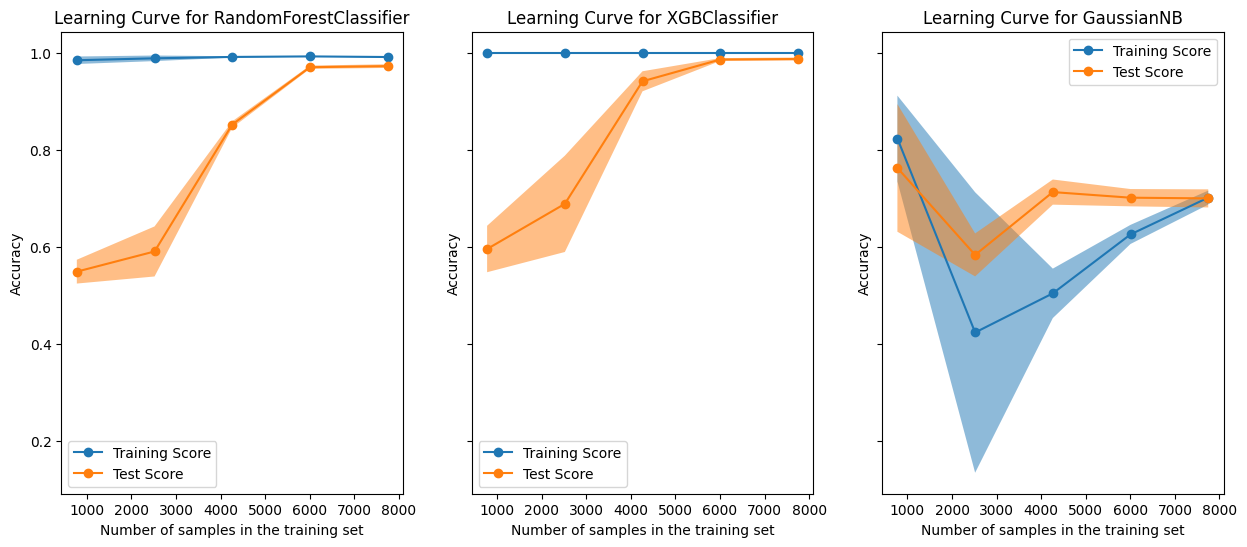

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

common_params = {
    "X": X_train_res,
    "y": y_train_res,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([rfch2, xgbh2, nbch2]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [ ]:
def plot_learning_curve(estimator1, estimator2, estimator3, X_train_res, y_train_res, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X_train_res, y_train_res, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Random Forest Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")

    # Second Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X_train_res, y_train_res, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("XGBoost Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")

    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X_train_res, y_train_res, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Naive Bayes Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

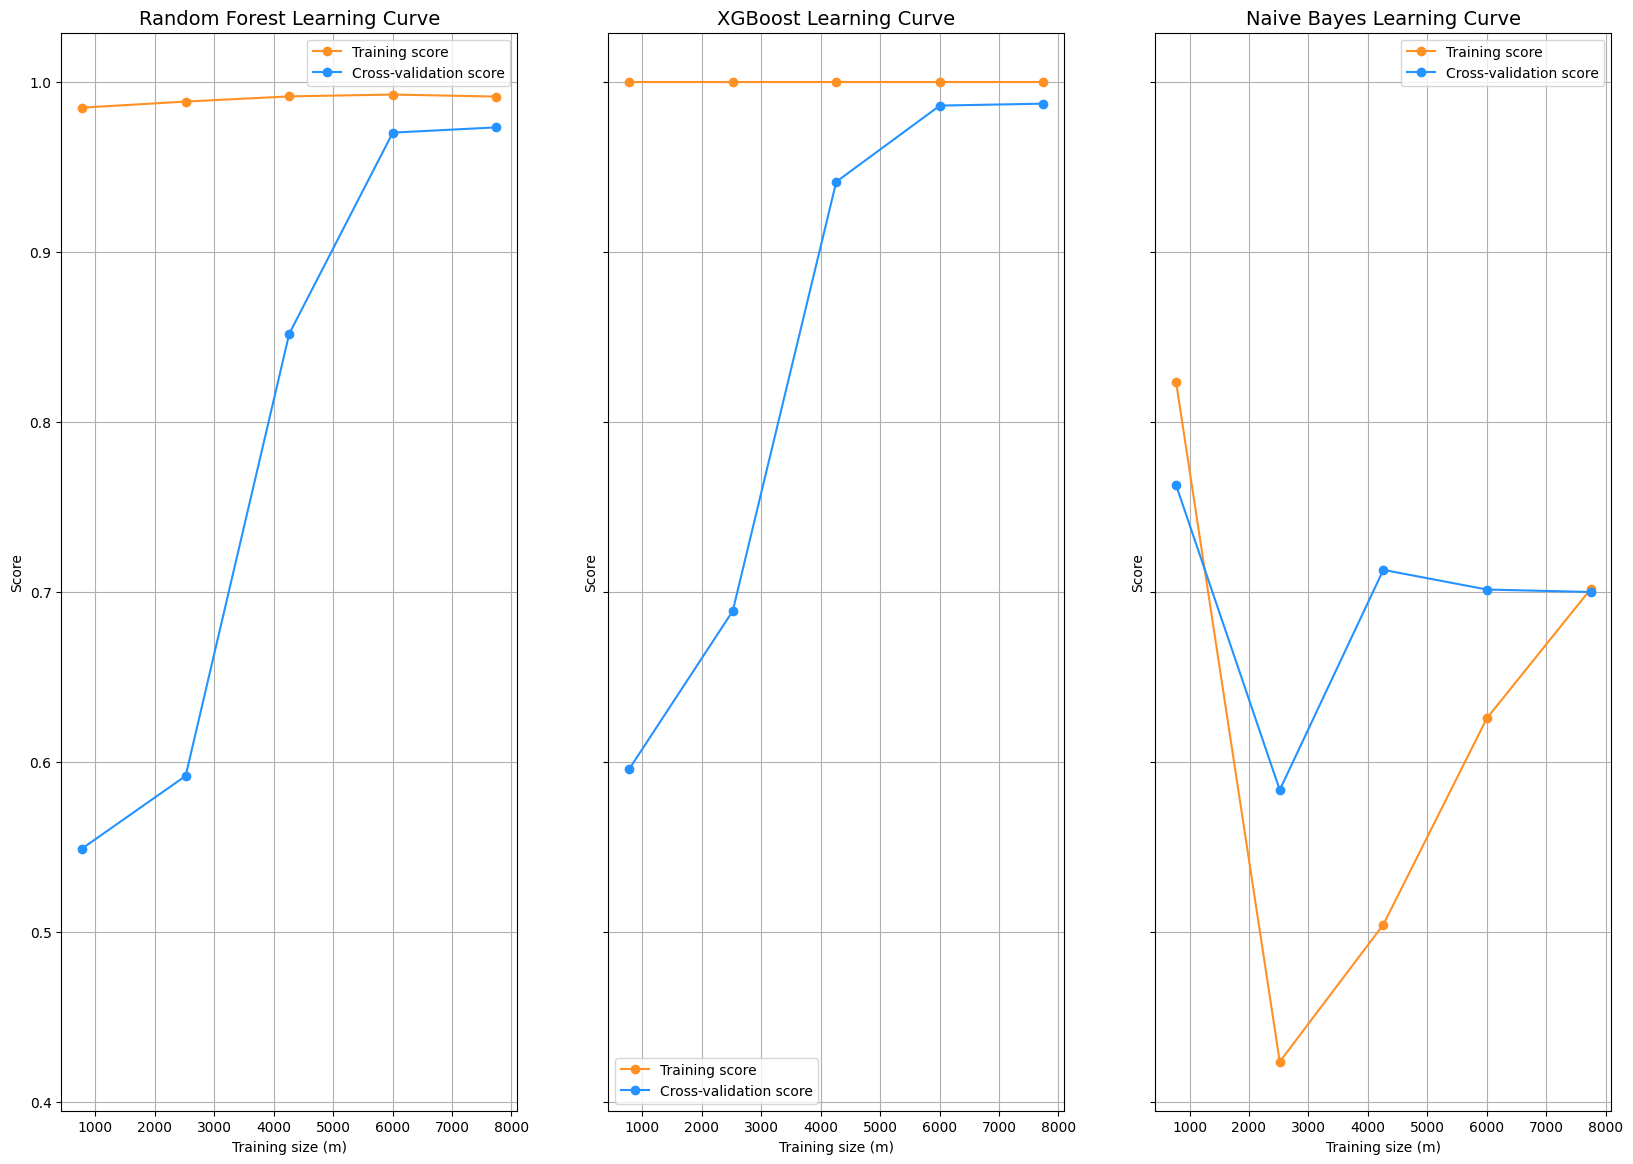

In [ ]:
plot_learning_curve(rfch2, xgbh2, nbch2, X_train_res, y_train_res, cv=5, n_jobs=4)

Semakin tinggi nilai akurasi maka semakin baik model prediksi yang dibentuk. Akan tetapi, dari learning curve di atas bisa dilihat bahwa terdapat overfitting pada model Random Forest dan XGBoost serta underfitting pada model Naive Bayes yang mana model hanya berforkus pada data training sehingga tidak dapat memprediksi titik lain secara keseluruhan. Overfitting bisa terjadi karena  tingginya variansi dan bias yang rendah, model terlalu kompleks, dan sedikitnya data training yang digunakan. Undefitting bisa terjadi karena tingginya variansi dan bias yang rendah, model terlalu simple, sedikitnya data training yang digunakan, dan masih adanya noise pada data training.

Learning curve digunakan untuk mengetahui seberapa besar pengaruh dari ditambahnya data training dan apakah estimator bisa lebih buruk karena variance error atau bias error.

Dibuat dua model learning curve dengan menggunakan library dan fungsi, ternyata keduanya menghasilkan plot yang sama.

Pada model Random Forest dan Extreme Gradient Boosting, training score yang dihasilkan cenderung lebih tinggi daripada test score, kemudian untuk data training yang sedikit, accuracy dari training set jauh lebih besar daripada test set, sedangkan menambahkan lebih banyak sampel data training akan meningkatkan nilai accuracy dari test set yang kemungkinan besar akan meningkatkan generalisasi. Pada model Naive Bayes, training score yang dihasilkan cenderung lebih rendah daripada test score, pada jumlah data training tertentu kedua nilai accuracy akan mengalami penurunan yang drastis, tetapi ketika sampel data training ditambah tetap nilai accuracy akan semakin mengalami peningkatan.


#Kesimpulan


Pada kasus kali ini, dimungkinkan akan lebih buruk jika algoritma salah memprediksi perusahaan tidak mengalami kebangkrutan padahal ia mengalami kebangkrutan atau lebih baik algoritma memprediksi perusahaan mengalami kebangkrutan padahal ia tidak mengalami kebangkrutan. Oleh karena itu, bisa digunakan nilai recall (kita membutuhkan nilai False Negative yang semakin rendah yang mana semakin rendah nilai FN maka nilai Recall akan semakin tinggi). Akan tetapi, agar terjadi keseimbangan antara presisi dan recall, **pengukuran performa model pada kasus ini menggunakan micro average F1-Score**. Selain itu, dikarenakan ingin dilihat seberapa bagus model pada tiap threshold maka pemilihan model terbaik ditambah **dengan pertimbangan nilai AUC** dari model.

Diketahui bahwa berdasarkan base model dan hyperparameter tuning nilai performansi terbaik dihasilkan oleh model Extreme Gradient Boosting dengan nilai f1-score base model (95.69%) dan hyperparameter tuning (95.85%). Oleh karena itu, untuk nilai cross validation, bootstraping, AUC-ROC, dan learning curve akan digunakan model hyperparameter tuning. Didapatkan nilai AUC sebesar 0.93 dan bootstraping sebesar 98.83%. Kemudian, dilakukan evaluasi model performance menggunakan cross validation dan didapatkan niali f1-score sebesar 95.47% yang mengindikasikan bahwa terjadi overfitting pada model. Hal tersebut juga bisa dilihat dari learning curve yang dibuat, model terlalu berfokus pada data training sehingga tidak dapat mencangkup keseluruhan data dan pada kurva training score lebih tinggi dari test score. Hal tersebut bisa diatasi dengan menambah sampel dari data training yang mengakibatkan dapat terjadi generalisasi sehingga test score akan mengalami peningkatan serta jarak antara training score dan test score semakin sedikit.

Oleh karena itu, pada kasus kali ini, akan digunakan model Extreme Gradient Boosting dengan parameter terbaik dari hasil hyperparameter tuning. Model ini memberikan nilai f1-score yang paling tinggi dengan kemungkinan overfitting yang lebih rendah dibanding kelas lain dan berdasarkan nilai AUC model tersebut juga dapat memisahkan kelas yang ada dengan baik.

#Feature Importance

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.7 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Create Tree Explainer object that can calculate shap values
explainer_xgb = shap.TreeExplainer(xgbh2)

In [ ]:
shap_values_xgb = explainer_xgb.shap_values(X_train_res, y_train_res)

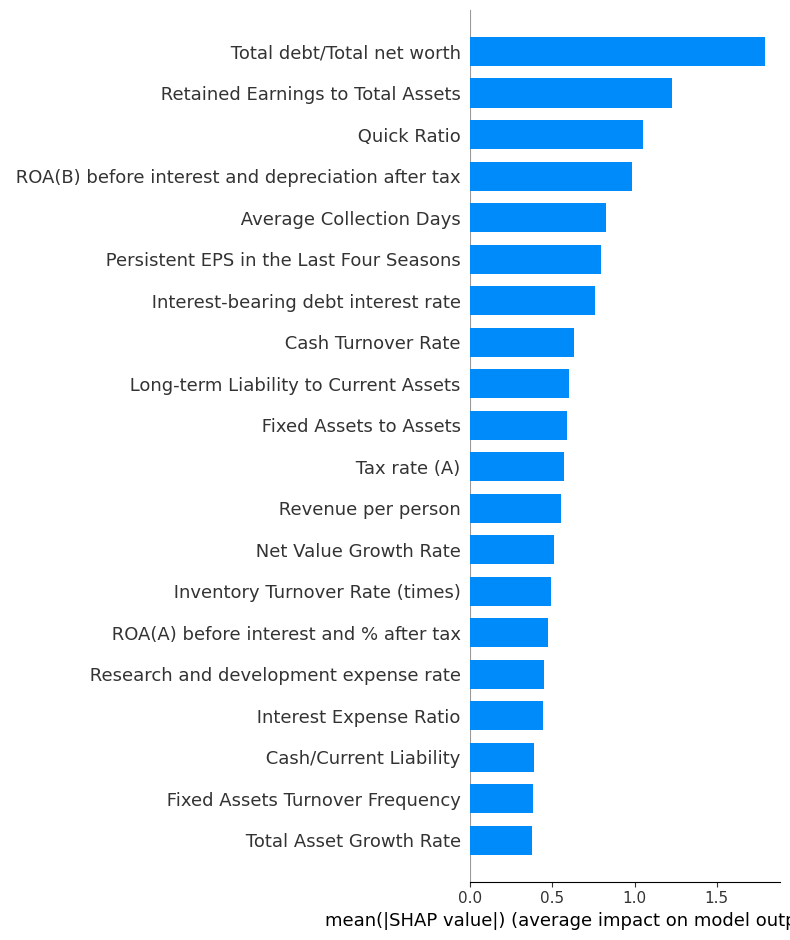

In [ ]:
shap.summary_plot(
    shap_values_xgb, X_train_res, feature_names=X_train_res.columns, plot_type="bar"
)

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [ ]:
base_imp2 = imp_df(X_train_res.columns, xgbh2.feature_importances_)
base_imp2

,feature,feature_importance
0,Retained Earnings to Total Assets,0.206603
1,Persistent EPS in the Last Four Seasons,0.197316
2,Total debt/Total net worth,0.092279
3,ROA(B) before interest and depreciation after...,0.077459
4,Quick Ratio,0.031320
5,Net Value Growth Rate,0.031084
6,ROA(C) before interest and depreciation befor...,0.026401
7,Interest-bearing debt interest rate,0.023929
8,Tax rate (A),0.018888
9,Total assets to GNP price,0.018720
